In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import rdkit
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from mordred import Calculator, descriptors
from rdkit.Chem import rdFingerprintGenerator
import matplotlib.pyplot as plt
import umap.umap_ as umap
import umap.plot
from sklearn.cluster import SpectralClustering

c:\Users\supak\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\supak\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\supak\AppData\Local\Programs\Python\Python3

In [48]:
df = pd.read_csv("pIC50.csv")
df

,cid,smiles,bioactivity,type,value (nM),pIC50
0,118159176,CO[C@@H](C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4cc...,Active,IC50,8300.0,5.080922
1,127024762,C[C@@H](CO)Nc1nc2ccccc2nc1N1CCN(Cc2cc(Cl)ccc2C...,Active,IC50,1570.0,5.804100
2,127024157,C[C@@H]1C[C@H]1Nc1nc2cnncc2nc1N1CCC([C@@H](F)c...,Active,IC50,145.0,6.838632
3,118159182,CO[C@H](C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4ccc...,Active,IC50,6600.0,5.180456
4,155525744,C[C@H](CO)Nc1nc2ccccc2nc1N1CCN(Cc2cc(Cl)ccc2Cl...,Active,IC50,1570.0,5.804100
...,...,...,...,...,...,...
435,118159306,COc1ccc(OC2CCN(c3nc4c(nc3NC3CC3)CCN(C)C4)CC2)c...,Inactive,IC50,145000.0,3.838632
436,118159408,COCC(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4ccc(F)cc4F...,Inactive,IC50,79500.0,4.099633
437,118159205,CS(=O)(=O)N1CCc2nc(N3CCC(Oc4ccc(F)cc4F)CC3)c(N...,Inactive,IC50,49300.0,4.307153
438,118180378,CS(=O)(=O)N1CCc2nc(N3CCC(Oc4ccc(F)cc4F)CC3)c(N...,Inactive,IC50,57200.0,4.242604


<Figure size 2000x2000 with 0 Axes>

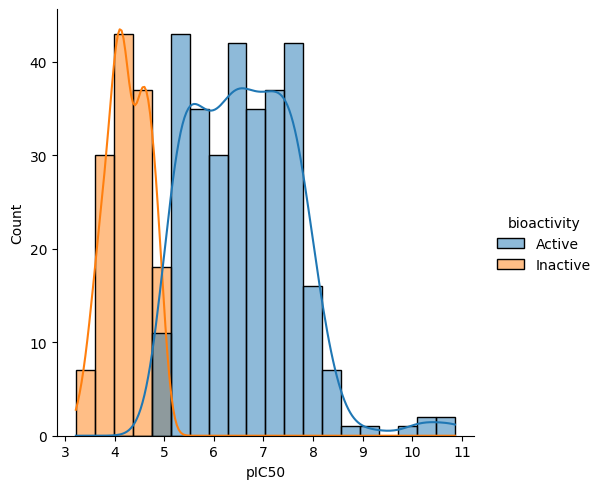

In [49]:
plt.figure(figsize=(20, 20))

sns.displot(df, bins=20, x='pIC50', hue='bioactivity', kde=True)
plt.show()

In [50]:
def canonical_smiles(smiles):
    mol_smiles = [Chem.MolFromSmiles(smi) for smi in smiles]
    smiles = [Chem.MolToSmiles(mol) for mol in mol_smiles]

    return smiles

In [51]:
CANNO_SMILES = canonical_smiles(df.smiles)
len(CANNO_SMILES)

440

In [52]:
df['smiles'] = CANNO_SMILES
df

,cid,smiles,bioactivity,type,value (nM),pIC50
0,118159176,CO[C@@H](C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4cc...,Active,IC50,8300.0,5.080922
1,127024762,C[C@@H](CO)Nc1nc2ccccc2nc1N1CCN(Cc2cc(Cl)ccc2C...,Active,IC50,1570.0,5.804100
2,127024157,C[C@@H]1C[C@H]1Nc1nc2cnncc2nc1N1CCC([C@@H](F)c...,Active,IC50,145.0,6.838632
3,118159182,CO[C@H](C)C(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4ccc...,Active,IC50,6600.0,5.180456
4,155525744,C[C@H](CO)Nc1nc2ccccc2nc1N1CCN(Cc2cc(Cl)ccc2Cl...,Active,IC50,1570.0,5.804100
...,...,...,...,...,...,...
435,118159306,COc1ccc(OC2CCN(c3nc4c(nc3NC3CC3)CCN(C)C4)CC2)c...,Inactive,IC50,145000.0,3.838632
436,118159408,COCC(=O)N1CCc2nc(NCC(F)F)c(N3CCC(Oc4ccc(F)cc4F...,Inactive,IC50,79500.0,4.099633
437,118159205,CS(=O)(=O)N1CCc2nc(N3CCC(Oc4ccc(F)cc4F)CC3)c(N...,Inactive,IC50,49300.0,4.307153
438,118180378,CS(=O)(=O)N1CCc2nc(N3CCC(Oc4ccc(F)cc4F)CC3)c(N...,Inactive,IC50,57200.0,4.242604


Morgan Fingerprint

In [53]:
compounds_morgan = []

for _, smiles, bioactivity, pIC50 in df[['smiles', 'bioactivity', 'pIC50']].itertuples():
    compounds_morgan.append((Chem.MolFromSmiles(smiles), bioactivity, pIC50))
compounds_morgan[:5]

[(<rdkit.Chem.rdchem.Mol at 0x2bf19b6a9d0>, 'Active', 5.080921907623926),
 (<rdkit.Chem.rdchem.Mol at 0x2bf19b6adc0>, 'Active', 5.804100347590767),
 (<rdkit.Chem.rdchem.Mol at 0x2bf19b68d60>, 'Active', 6.838631997765026),
 (<rdkit.Chem.rdchem.Mol at 0x2bf19b6bca0>, 'Active', 5.180456064458131),
 (<rdkit.Chem.rdchem.Mol at 0x2bf19b6bd80>, 'Active', 5.804100347590767)]

In [54]:
compounds_morgan_structure = pd.DataFrame(compounds_morgan, columns=["Structure", "bioactivity", "pIC50"])
compounds_morgan_structure.head(5)

,Structure,bioactivity,pIC50
0,<rdkit.Chem.rdchem.Mol object at 0x000002BF19B...,Active,5.080922
1,<rdkit.Chem.rdchem.Mol object at 0x000002BF19B...,Active,5.804100
2,<rdkit.Chem.rdchem.Mol object at 0x000002BF19B...,Active,6.838632
3,<rdkit.Chem.rdchem.Mol object at 0x000002BF19B...,Active,5.180456
4,<rdkit.Chem.rdchem.Mol object at 0x000002BF19B...,Active,5.804100


In [55]:
def generate_mfpts(data):
    Mfpts = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) for mol in data]
    return Mfpts

mfpts = generate_mfpts(compounds_morgan_structure.Structure[:])
print("Number of compounds converted:", len(mfpts))
print("Fingerprint length per compound:", len(mfpts[0]))

Number of compounds converted: 440
Fingerprint length per compound: 2048


In [56]:
fp_name_morgan = [f'Bit_{i}' for i in range(2048)]
fp_bits_morgan = [list(l) for l in mfpts]

morganfp_df = pd.DataFrame(fp_bits_morgan, index=df["bioactivity"], columns=fp_name_morgan)
morganfp_df.reset_index(inplace=True)  # Reset index to bring "cid" back as a column
morganfp_df.rename(columns={"index": "bioactivity"})# Rename the index column to "cid"
morganfp_df.head()

,bioactivity,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,Active,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Active,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Active,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Active,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Active,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
morganfp_df_umap = morganfp_df.iloc[:, 1:]
morganfp_df_umap

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
436,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


RDK5 Fingerprint

In [58]:
compounds_rdk5 = []

for _, smiles, bioactivity in df[['smiles', 'bioactivity']].itertuples():
    compounds_rdk5.append((Chem.MolFromSmiles(smiles), bioactivity))
compounds_rdk5[:5]

[(<rdkit.Chem.rdchem.Mol at 0x2bf13e0dfc0>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x2bf13e0e110>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x2bf13e0df50>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x2bf13e0d380>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x2bf13e0d620>, 'Active')]

In [59]:
compound_rdk5_structure = pd.DataFrame(compounds_rdk5, columns=["Structure", "bioactivity"])
compound_rdk5_structure

,Structure,bioactivity
0,<rdkit.Chem.rdchem.Mol object at 0x000002BF13E...,Active
1,<rdkit.Chem.rdchem.Mol object at 0x000002BF13E...,Active
2,<rdkit.Chem.rdchem.Mol object at 0x000002BF13E...,Active
3,<rdkit.Chem.rdchem.Mol object at 0x000002BF13E...,Active
4,<rdkit.Chem.rdchem.Mol object at 0x000002BF13E...,Active
...,...,...
435,<rdkit.Chem.rdchem.Mol object at 0x000002BF18D...,Inactive
436,<rdkit.Chem.rdchem.Mol object at 0x000002BF18D...,Inactive
437,<rdkit.Chem.rdchem.Mol object at 0x000002BF18D...,Inactive
438,<rdkit.Chem.rdchem.Mol object at 0x000002BF18D...,Inactive


In [60]:
def generate_rdk5(data):
    rdk5_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)
    rdk5_fingerprint = [rdk5_gen.GetFingerprint(mol) for mol in data]
    return rdk5_fingerprint

rdk5fp = generate_rdk5(compound_rdk5_structure.Structure[:])
print("Number of compounds converted:", len(rdk5fp))
print("Fingerprint length per compound:", len(rdk5fp[0]))

Number of compounds converted: 440
Fingerprint length per compound: 2048


In [61]:
fp_name_rdk5 = [f'Bit_{i}' for i in range(2048)]
fp_bits_rdk5 = [list(l) for l in rdk5fp]

rdk5_df = pd.DataFrame(fp_bits_rdk5, index=df["bioactivity"], columns=fp_name_rdk5)
rdk5_df.reset_index(inplace=True)  # Reset index to bring "cid" back as a column
rdk5_df.rename(columns={"index": "bioactivity"})# Rename the index column to "cid"
rdk5_df.head()

,bioactivity,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,Active,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,Active,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,Active,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,Active,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,Active,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [62]:
rdk5_df_umap = rdk5_df.iloc[:, 1:]
rdk5_df_umap

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
436,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
437,1,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
438,1,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


 UMAP Morgan Fingerprint

In [105]:
umapper = umap.UMAP(n_neighbors=20, 
                    n_components=2,
                    metric='euclidean', 
                    #random_state=5
                    )

In [110]:
data_umap_morgan = umapper.fit_transform(morganfp_df_umap)


In [111]:
data_umap_morgan_x = pd.DataFrame(data_umap_morgan[:, 0], columns = ['x'])
data_umap_morgan_y = pd.DataFrame(data_umap_morgan[:, 1], columns = ['y'])
bioactivity = pd.DataFrame(morganfp_df["bioactivity"].values, columns = ['bioactivity'])
plot_umap_morgan = pd.concat([bioactivity, data_umap_morgan_x, data_umap_morgan_y], axis = 1)
plot_umap_morgan

,bioactivity,x,y
0,Active,-1.798194,4.101780
1,Active,15.992585,3.070303
2,Active,10.632153,1.966107
3,Active,-1.785797,4.079651
4,Active,15.790541,2.948341
...,...,...,...
435,Inactive,0.200481,5.099522
436,Inactive,-1.527066,4.446268
437,Inactive,-0.618899,4.261407
438,Inactive,-0.719976,4.124501


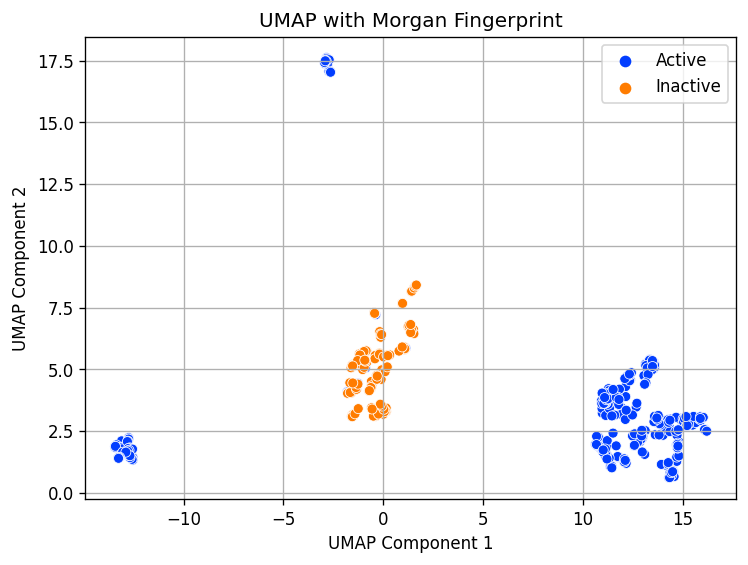

In [118]:
plt.figure(figsize = (7, 5), dpi=120)
sns.scatterplot(x='x', y='y', hue='bioactivity', data=plot_umap_morgan, palette='bright')
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid()
plt.legend()
plt.title('UMAP with Morgan Fingerprint', fontsize=12)
plt.show()

UMAP with RDK5 Fingerprint

In [113]:
umapper = umap.UMAP(n_neighbors=50, 
                    n_components=2,
                    metric='euclidean', 
                    #random_state=42,
                    )

In [114]:
data_umap_rdk5 = umapper.fit_transform(rdk5_df_umap)

In [115]:
data_umap_rdk5_x = pd.DataFrame(data_umap_rdk5[:, 0], columns = ['x'])
data_umap_rdk5_y = pd.DataFrame(data_umap_rdk5[:, 1], columns = ['y'])
bioactivity = pd.DataFrame(rdk5_df["bioactivity"].values, columns = ['bioactivity'])
plot_umap_rdk5 = pd.concat([bioactivity, data_umap_rdk5_x, data_umap_rdk5_y], axis = 1)
plot_umap_rdk5

,bioactivity,x,y
0,Active,8.729053,-7.673346
1,Active,6.376541,14.461403
2,Active,12.900278,9.159210
3,Active,8.748416,-7.717289
4,Active,6.356009,14.462924
...,...,...,...
435,Inactive,9.107578,-5.782745
436,Inactive,8.717504,-7.615221
437,Inactive,9.454977,-4.796273
438,Inactive,9.503439,-4.761817


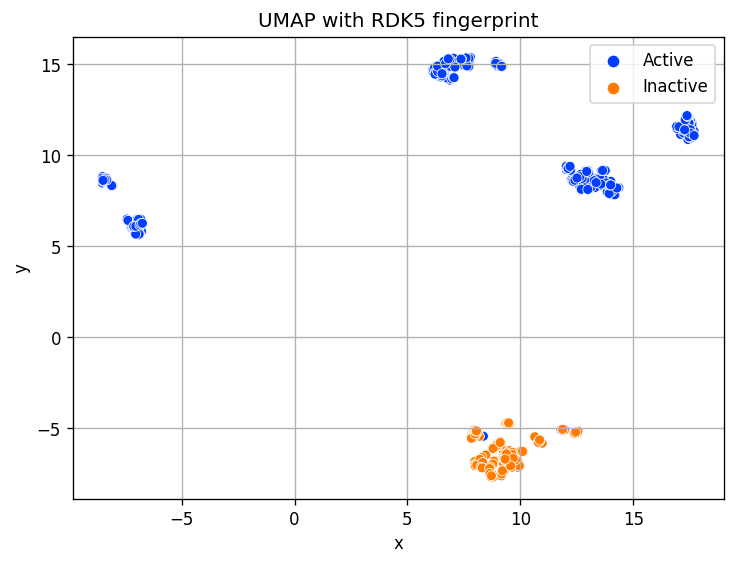

In [117]:
plt.figure(figsize = (7, 5), dpi=120)
sns.scatterplot(x='x', y='y', hue='bioactivity', data=plot_umap_rdk5, palette='bright')
plt.grid()
plt.legend()
plt.title('UMAP with RDK5 fingerprint', fontsize=12)
plt.show()

Clustering by Butina of Morgan FP

In [71]:
from rdkit.ML.Cluster import Butina

In [72]:
def tanimoto_distance_matrix(fp_list):
    
    dissimilarity_matrix = []
    
    for i in range(1, len(fp_list)):
        
        similarities = DataStructs.BulkTanimotoSimilarity(fp_list[i], fp_list[:i])
        dissimilarity_matrix.extend([1 - x for x in similarities])
    return dissimilarity_matrix

In [73]:
sim = DataStructs.TanimotoSimilarity(mfpts[0], mfpts[1])
print(f"Tanimoto similarity: {sim:.2f}, distance: {1-sim:.2f}")

Tanimoto similarity: 0.24, distance: 0.76


In [74]:
tanimoto_distance_matrix(mfpts)

[0.7572815533980582,
 0.6734693877551021,
 0.6808510638297872,
 0.0,
 0.7572815533980582,
 0.6734693877551021,
 0.7572815533980582,
 0.0,
 0.6808510638297872,
 0.7572815533980582,
 0.7821782178217822,
 0.7,
 0.7340425531914894,
 0.7821782178217822,
 0.7,
 0.5813953488372092,
 0.7916666666666666,
 0.611764705882353,
 0.5813953488372092,
 0.7916666666666666,
 0.6463414634146342,
 0.7647058823529411,
 0.2857142857142857,
 0.6739130434782609,
 0.7647058823529411,
 0.2857142857142857,
 0.6627906976744187,
 0.7608695652173914,
 0.7264150943396226,
 0.6276595744680851,
 0.6063829787234043,
 0.7264150943396226,
 0.6276595744680851,
 0.6521739130434783,
 0.6333333333333333,
 0.5888888888888889,
 0.7037037037037037,
 0.7358490566037736,
 0.4367816091954023,
 0.7037037037037037,
 0.7358490566037736,
 0.696969696969697,
 0.6086956521739131,
 0.7184466019417476,
 0.4838709677419355,
 0.7037037037037037,
 0.7358490566037736,
 0.4367816091954023,
 0.7037037037037037,
 0.7358490566037736,
 0.696969696

In [75]:
n = len(mfpts)

elem_triangular_matr = (n * (n - 1)) / 2

print(
    f"Elements in the triangular matrix ({elem_triangular_matr:.0f}) ==",
    f"tanimoto_distance_matrix(mfpts) ({len(tanimoto_distance_matrix(mfpts))})",
)

Elements in the triangular matrix (96580) == tanimoto_distance_matrix(mfpts) (96580)


In [76]:
def cluster_mfpts(fingerprints, cutoff=0.3):

    distance_matrix = tanimoto_distance_matrix(mfpts)
    clusters = Butina.ClusterData(distance_matrix, len(mfpts), cutoff, isDistData=True)
    clusters = sorted(clusters, key=len, reverse=True)
    return clusters

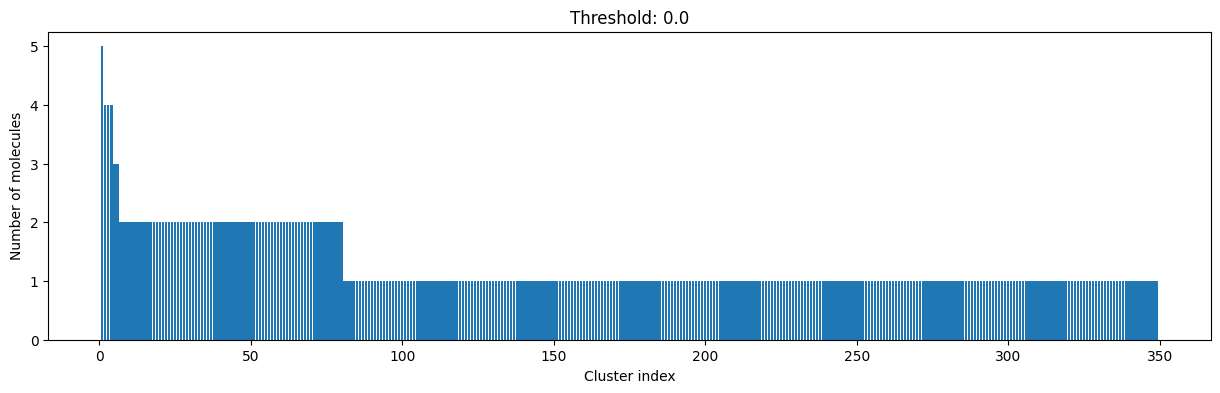

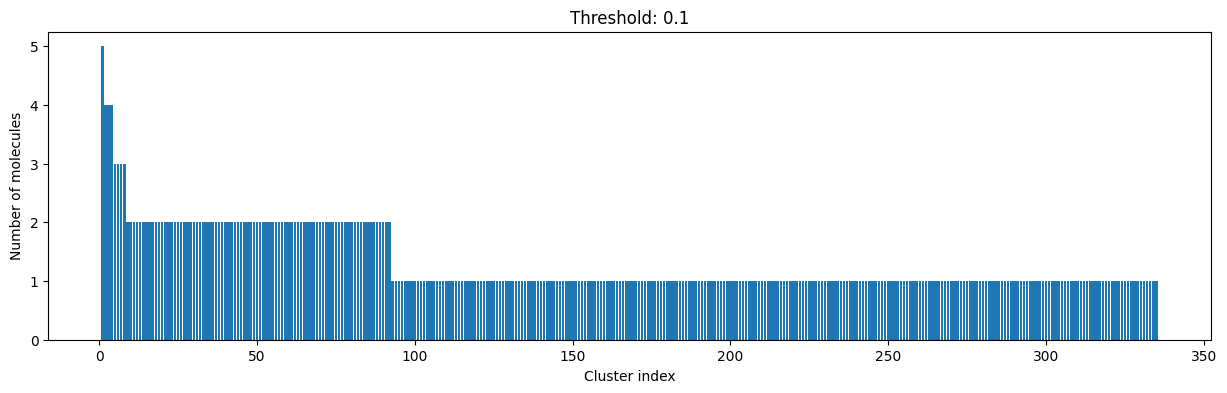

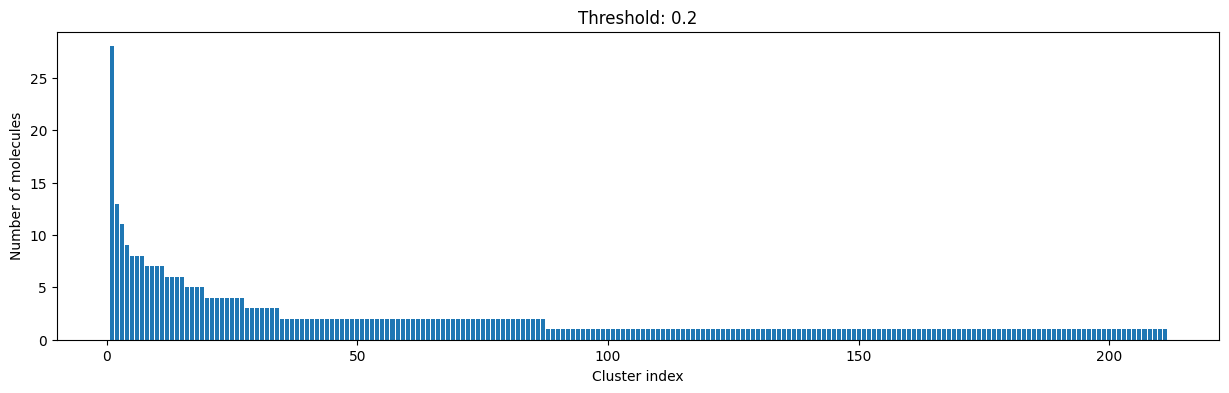

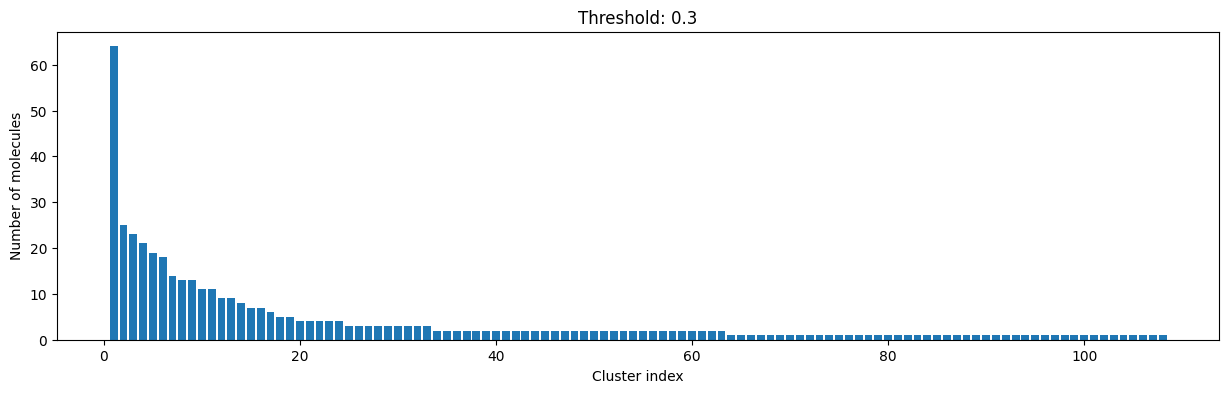

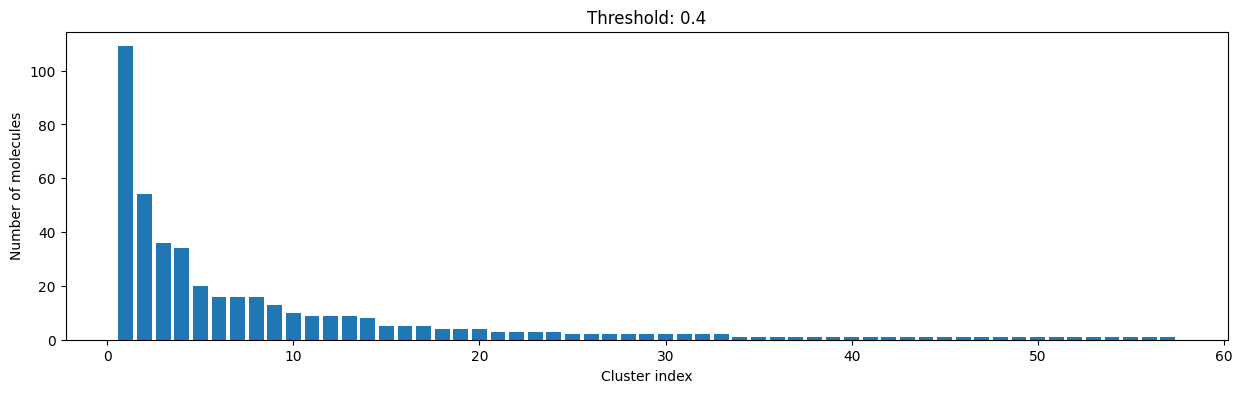

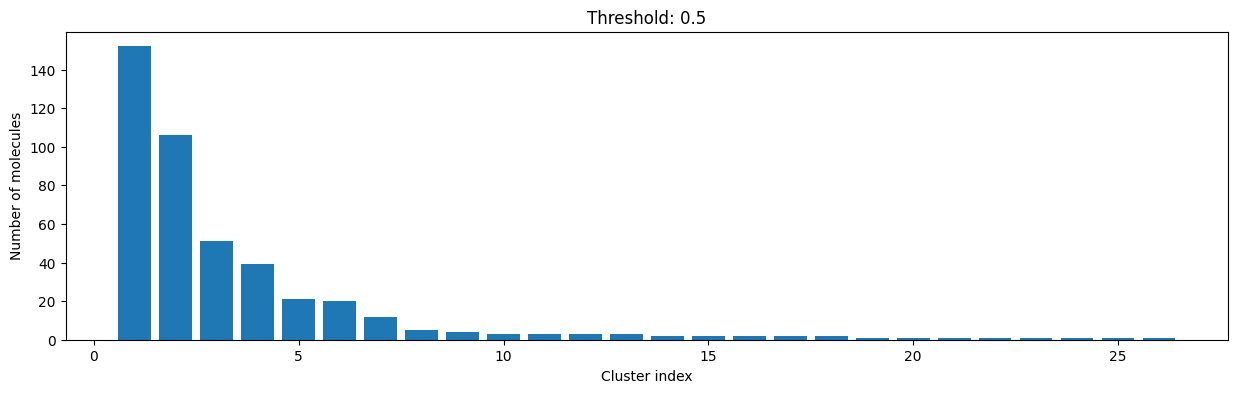

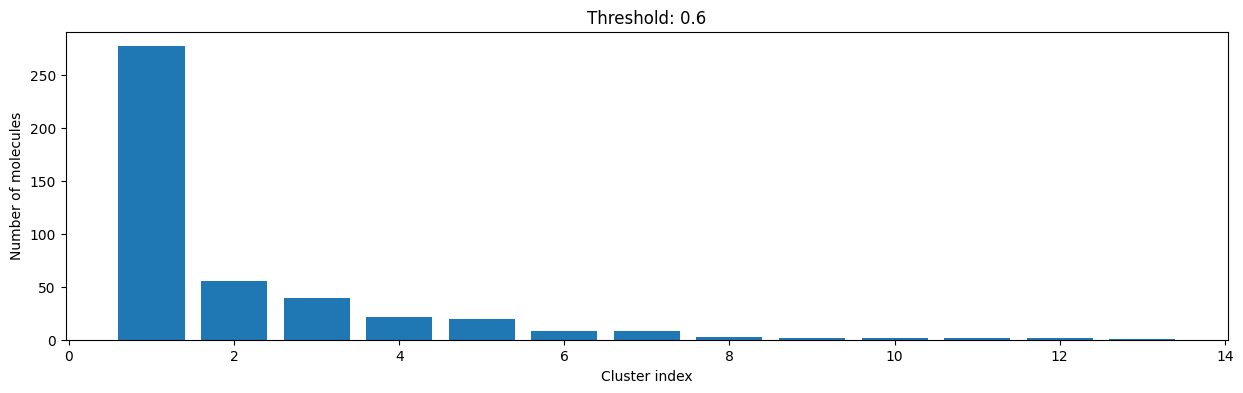

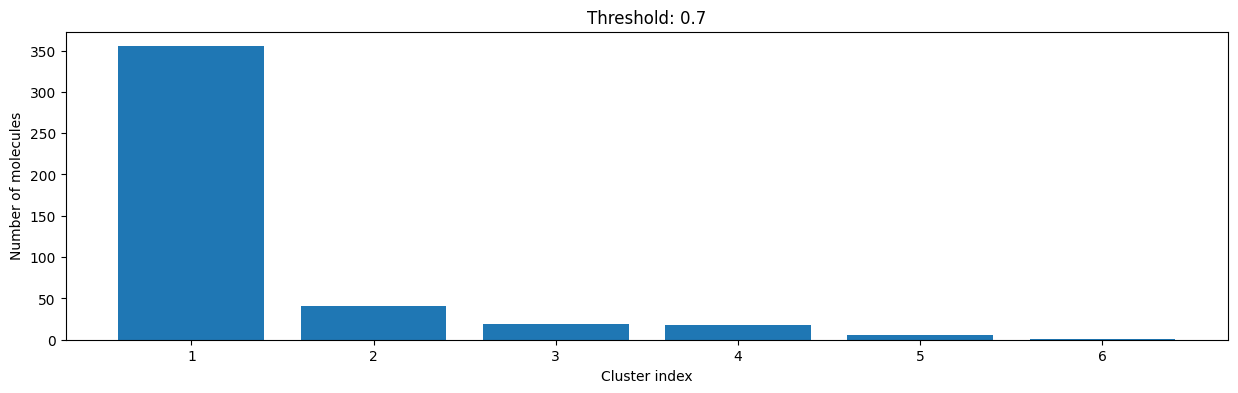

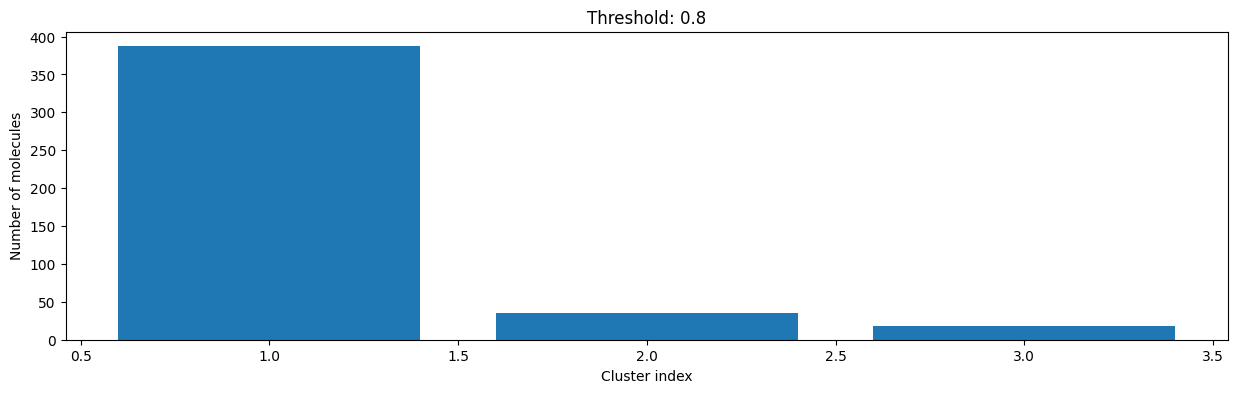

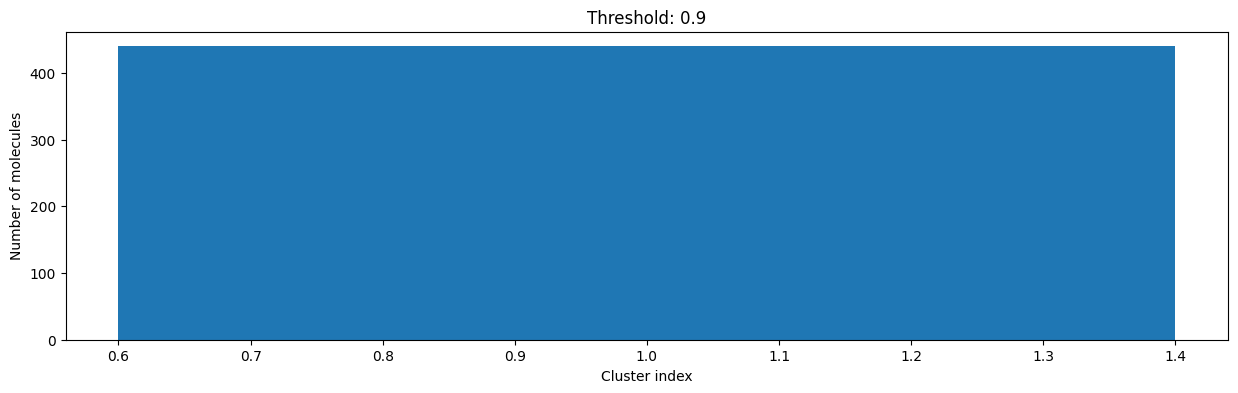

In [77]:
for cutoff in np.arange(0.0, 1.0, 0.1):
    clusters = cluster_mfpts(mfpts, cutoff=cutoff)
    fig, ax = plt.subplots(figsize=(15, 4))
    ax.set_title(f"Threshold: {cutoff:3.1f}")
    ax.set_xlabel("Cluster index")
    ax.set_ylabel("Number of molecules")
    ax.bar(range(1, len(clusters) + 1), [len(c) for c in clusters], lw=5)
    plt.show()

In [78]:
from sklearn.decomposition import PCA

In [79]:
data_umap_morgan

array([[ 8.30802500e-01, -1.19345212e+00],
       [ 1.94158173e+01, -1.82400489e+00],
       [ 1.39659109e+01, -1.82645464e+00],
       [ 8.51144135e-01, -1.17342222e+00],
       [ 1.93644085e+01, -1.89812076e+00],
       [ 1.77553654e+01, -1.31021306e-01],
       [ 1.47447987e+01, -4.45968509e-02],
       [ 1.92549381e+01, -1.76586270e+00],
       [ 1.72677479e+01, -1.66904521e+00],
       [ 1.43307228e+01, -1.94429100e+00],
       [ 1.43922348e+01, -1.95541966e+00],
       [ 1.48997583e+01, -3.97677094e-01],
       [ 1.85467129e+01, -1.88008821e+00],
       [ 1.49007196e+01, -2.07530499e+00],
       [ 1.50035515e+01, -2.06986046e+00],
       [ 1.64009151e+01, -1.38711107e+00],
       [ 1.73771038e+01, -2.37759963e-01],
       [ 1.50058222e+01, -5.54829538e-01],
       [ 1.88085556e+01, -1.39252472e+00],
       [ 1.74156647e+01, -1.33039880e+00],
       [ 1.80301991e+01,  2.62578219e-01],
       [ 1.80900173e+01,  3.16796094e-01],
       [ 1.78766689e+01, -4.29556519e-03],
       [ 1.

Plot Each Clusters by UMAP

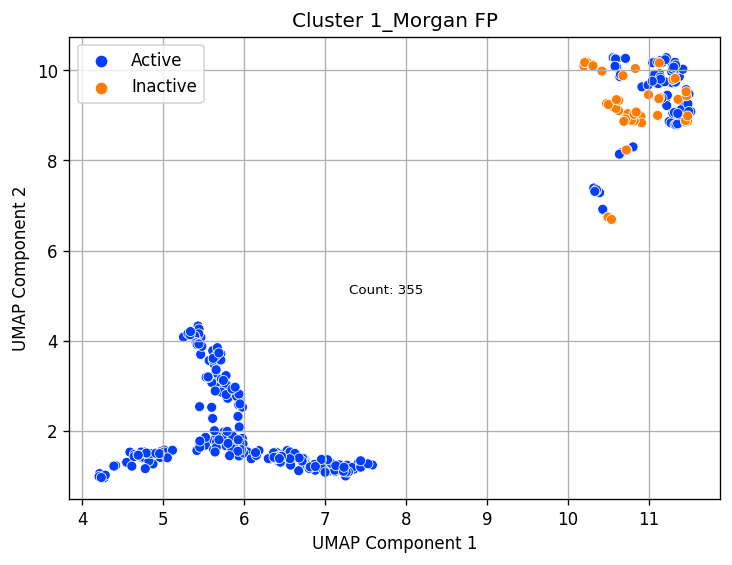

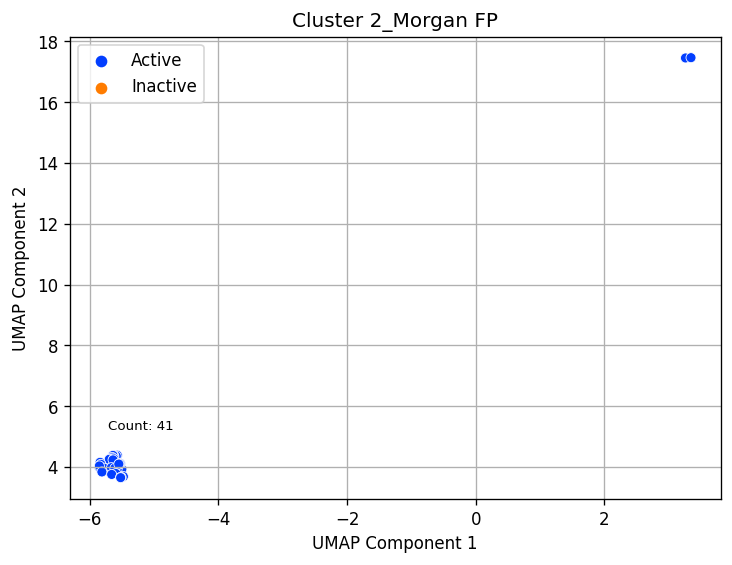

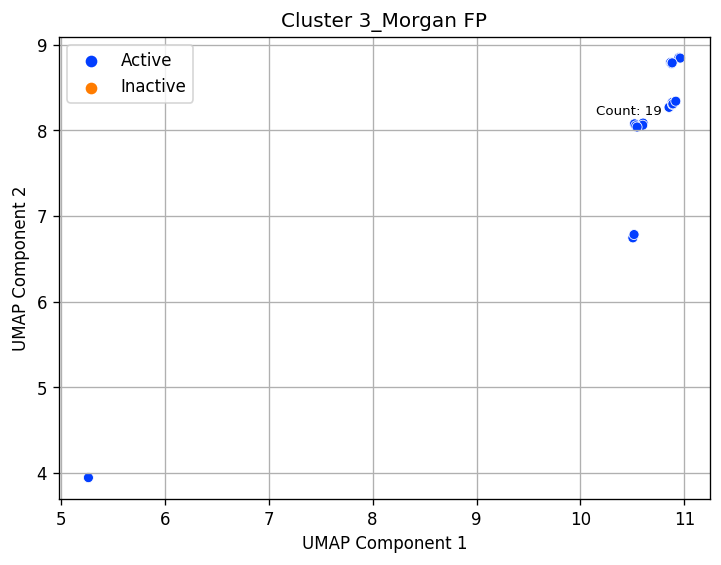

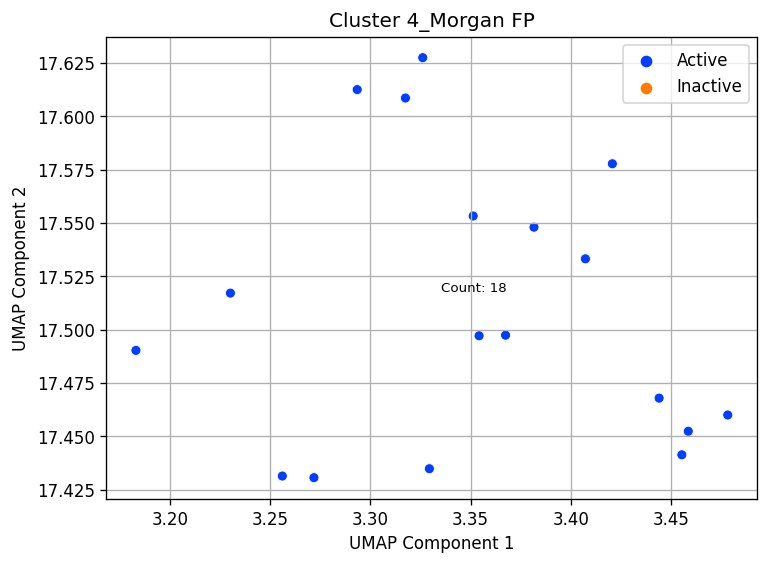

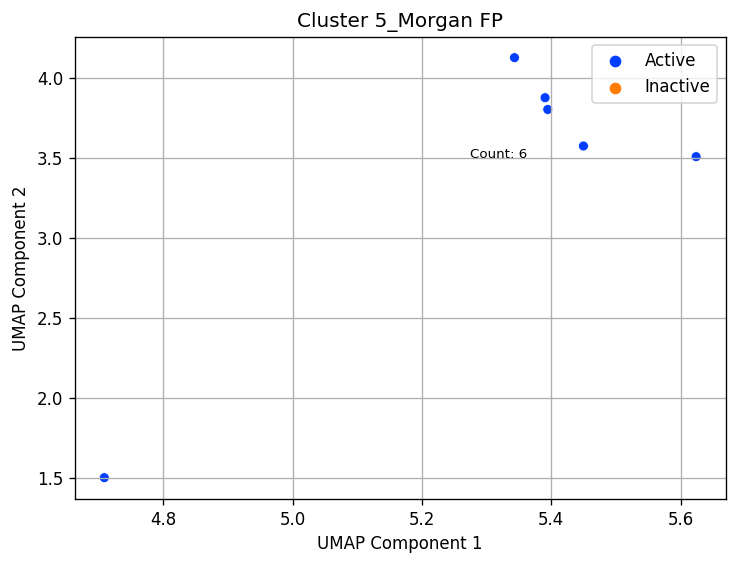

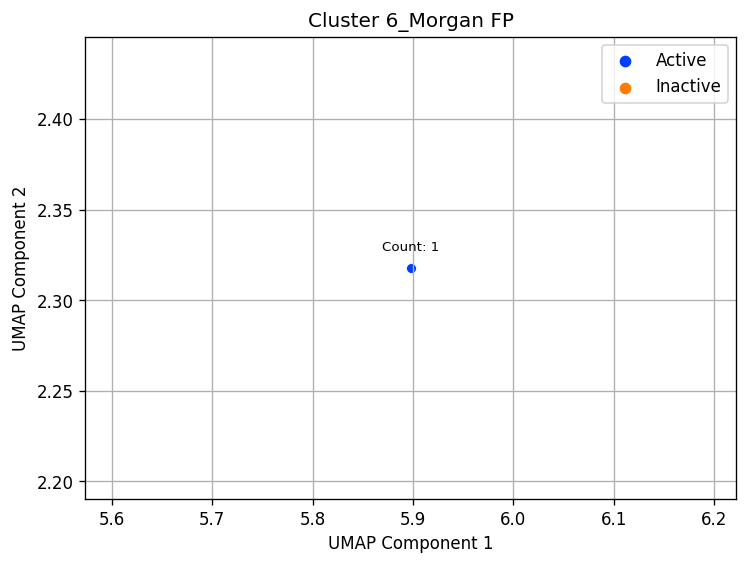

In [80]:
# Start with UMAP
umapper = umap.UMAP(n_neighbors=20, 
                    n_components=5,
                    metric='euclidean',
                    random_state=5
                    )

data_umap_morgan = umapper.fit_transform(morganfp_df_umap)

# Apply Butina functions
cutoff = 0.7
clusters = cluster_mfpts(data_umap_morgan, cutoff=cutoff)


# Create a scatter plot using Seaborn
for cluster_index, cluster in enumerate(clusters, start=1):
    cluster_molecule_indices = cluster 
    
    cluster_coords = data_umap_morgan[cluster_molecule_indices, :]
    
    x_coords = cluster_coords[:, 0]
    y_coords = cluster_coords[:, 1]
    
    cluster_labels = np.full(len(cluster_molecule_indices), f"Cluster {cluster_index}")
    
    
    data_umap_morgan_x = pd.DataFrame(x_coords, columns = ['x'])
    data_umap_morgan_y = pd.DataFrame(y_coords, columns = ['y'])
    bioactivity = pd.DataFrame(morganfp_df["bioactivity"].values, columns = ['bioactivity'])
    plot_umap_morgan_butina = pd.concat([bioactivity, data_umap_morgan_x, data_umap_morgan_y], axis = 1)
    plot_umap_morgan_butina
    
    plt.figure(figsize=(7, 5), dpi=120)
    sns.scatterplot(x="x", y="y", hue='bioactivity' , data=plot_umap_morgan_butina, palette='bright')
    plt.xlabel("UMAP Component 1")
    plt.ylabel("UMAP Component 2")
    plt.title(f"Cluster {cluster_index}_Morgan FP")
    
    cluster_size = len(cluster_molecule_indices)
    mean_x = np.mean(data_umap_morgan[cluster_molecule_indices, 0])
    mean_y = np.mean(data_umap_morgan[cluster_molecule_indices, 1])
    plt.annotate(f"Count: {cluster_size}", (mean_x, mean_y), xytext=(0, 10),textcoords="offset points", ha='center', fontsize=8)

    plt.legend()
    plt.grid()
    plt.show()

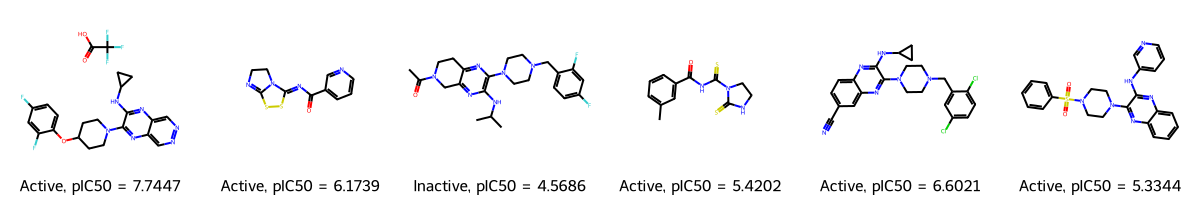

In [81]:
Draw.MolsToGridImage(
    [compounds_morgan_structure["Structure"][clusters[i][0]] for i in range(6)],
    molsPerRow=6,
    legends=[
        f"{compounds_morgan_structure['bioactivity'][clusters[i][0]]}, pIC50 = {compounds_morgan_structure['pIC50'][clusters[i][0]]:.4f}"
        for i in range(6)]
)